<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Analise de Microfosseis</h1>


# <font color='red' style='font-size: 30px;'>Dataset da aquisição de imagens</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas
https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/ 

https://docs.python.org/3/library/warnings.html

https://seaborn.pydata.org/

https://www.statsmodels.org/

Importando dataframes necessários para as modelagens 2D e 3D dos arquivos .tif, os demais dataframes de analise de dados e calculos estatisticos, são os mais comuns utilizados para analise de dados, incluindo bibliotecas de visualização e validação de dados.

## Processamento de imagem em Python 

scikit-image é uma coleção de algoritmos para processamento de imagens. Está disponível gratuitamente e sem restrições . 

In [120]:
!pip install graphviz==0.9
!pip install pydot
!pip install seaborn==0.9.0
!conda install scikit-image

Solving environment: ...working... done

# All requested packages already installed.



In [121]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns 
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.util import montage as montage2d

## Descrição

 Obtenção de imagens atráves de analise de tons de cinza de um aquivo .tiff, criando modelos 2D e 3D

In [122]:
fossil_path = "teste1.tif"
fossil_data = imread(fossil_path)
print('dados carregados teste 1 {}'.format(fossil_data.shape))

dados carregados teste 1 (250, 296, 349)


Text(0.5, 1.0, 'Slice Histogram')

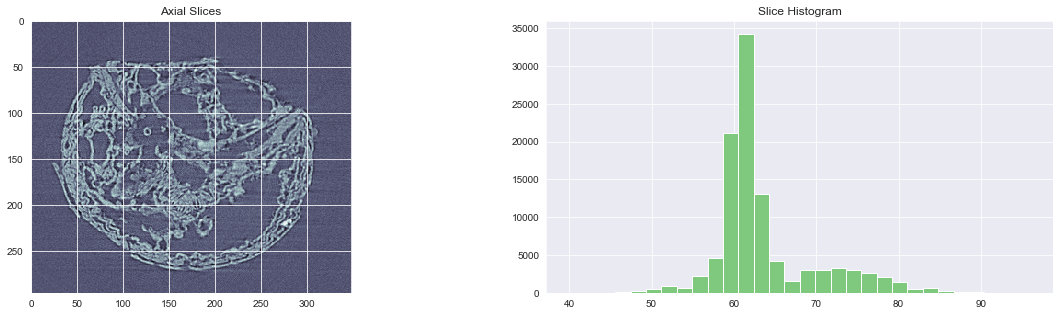

In [123]:
%matplotlib inline
slice_idx = int(fossil_data.shape[0]/2)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 5))

ax1.imshow(fossil_data[slice_idx], cmap = 'bone')
ax1.set_title('Axial Slices')
_ = ax2.hist(fossil_data[slice_idx].ravel(), 30)
ax2.set_title('Slice Histogram')

In [124]:
from PIL import Image
import numpy 

im = Image.open('teste2.tif') 
imarray = numpy.array(im) 
imarray.shape 
im.show()

# **Filtro**

A utilização de filtros pode ajudar na composição de modelos para serem analisados, geração de valores médios e irriquecendo o banco de dados com diferentes formas de olhar para a resposta adiquirida com  os arquivos .tiff

Text(0.5, 1.0, 'Filtrado')

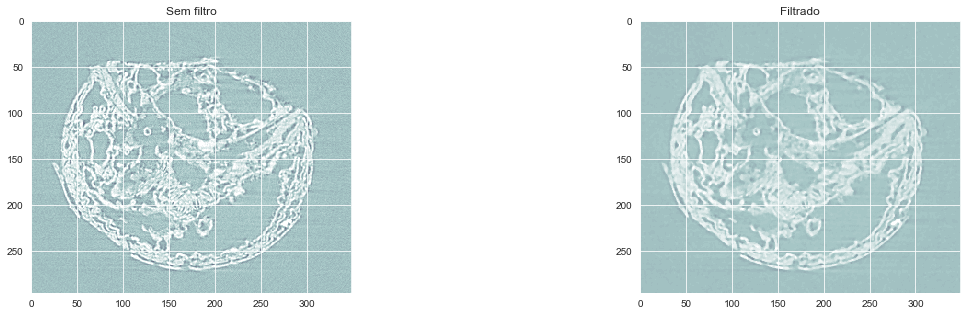

In [125]:
%matplotlib inline
from scipy.ndimage.filters import median_filter
filter_fossil_data = median_filter(fossil_data, (3,3,3))


slice_idx = int(fossil_data.shape[0]/2)
test_slice = fossil_data[slice_idx]
test_filt_slice = filter_fossil_data[slice_idx]

im_args = dict(cmap = 'bone', vmin = 10, vmax = 80)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 5))
ax1.imshow(test_slice, **im_args)
ax1.set_title('Sem filtro')
_ = ax2.imshow(test_filt_slice, **im_args)
ax2.set_title('Filtrado')

# **Visualização de multiplos cortes**

Como os arquivos .tiff podem adiquirir "forma tridimensional" uma analise com mais acurária possibilita ver diferentes cortes do corpo representado no arquivo

(-0.5, 1183.5, 999.5, -0.5)

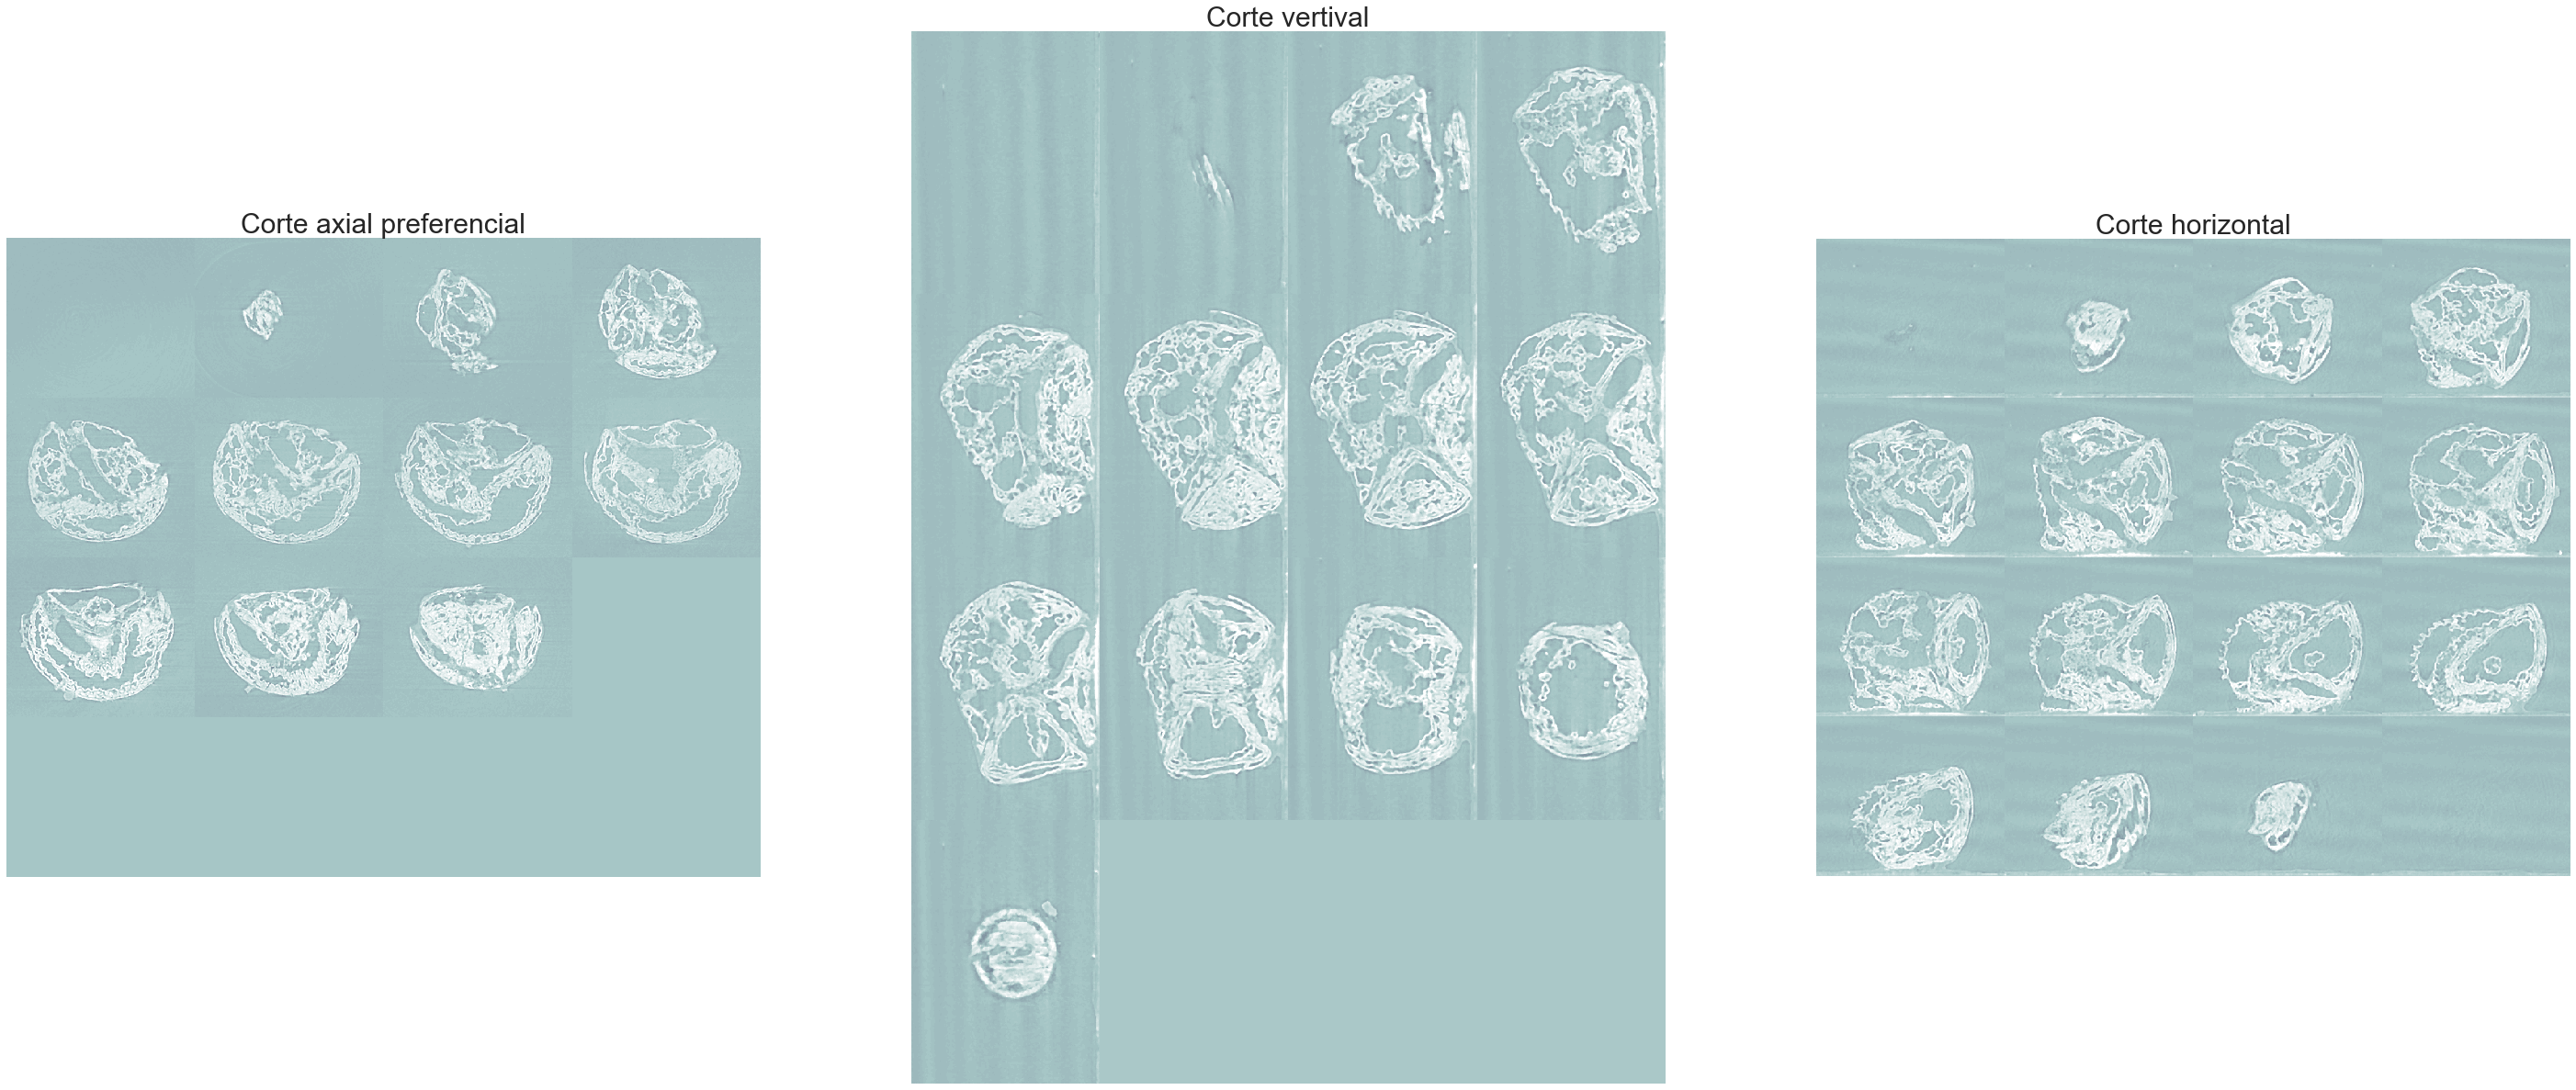

In [126]:
%matplotlib inline
skip_border = 20
skip_middle = 20
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (50, 50))
ax1.imshow(montage2d(filter_fossil_data[skip_border:-skip_border:skip_middle]),**im_args)
ax1.set_title('Corte axial preferencial', fontsize=30)
ax1.axis('off')

ax2.imshow(montage2d(filter_fossil_data.transpose(1,2,0)[skip_border:-skip_border:skip_middle]), **im_args)
ax2.set_title('Corte vertival', fontsize=30)
ax2.axis('off')

ax3.imshow(montage2d(filter_fossil_data.transpose(2,0,1)[skip_border:-skip_border:skip_middle]), **im_args)
ax3.set_title('Corte horizontal', fontsize=30)
ax3.axis('off')

In [ ]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 5))
thresh_fossil_data = filter_fossil_data > 65
thresh_slice = thresh_fossil_data[slice_idx]
ax1.imshow(test_filt_slice, cmap = 'bone')
ax1.set_title('Filtrado')
_ = ax2.imshow(thresh_slice)
ax2.set_title('Axial', fontsize=30)

Text(0.5, 1.0, 'Axial')

## **Morfologia do corpo**

Com o conjunto dos dados, vamos aos limites de modelos que podemos fazer com as ferramentas que temos acesso, tudo isso pensando em enriquecer o banco de dados, por exemplo imagine que uma unica espécie, com apenas uma analise possa gerar até 100 modelos diferentes. Isso ajudaria a engordar o banco de dados para podermos utilizar ferramentas de aprendizado de maquina.

In [ ]:
%matplotlib inline
from skimage.morphology import binary_closing, ball
closed_fossil_data = binary_closing(thresh_fossil_data, ball(5))
close_slice = closed_fossil_data[slice_idx]
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 5))

ax1.imshow(test_filt_slice, cmap = 'bone')
ax1.set_title('Filtrados')
_ = ax2.imshow(close_slice)
ax2.set_title('áreas ocupadas por valores positivos', fontsize=20)

In [ ]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
def show_3d_mesh(p, threshold):
    verts, faces, _, _ = measure.marching_cubes_lewiner(p, threshold)

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=1.0, edgecolor='red', linewidth = 0.1)
    mesh.set_facecolor([.1, 1, .1])
    mesh.set_edgecolor([0, 0, 1])
    
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    
    ax.view_init(45, 45)
    return fig

In [ ]:
from scipy.ndimage import zoom

fossil_downscale = zoom(closed_fossil_data.astype(np.float32), 0.25)
_ = show_3d_mesh(fossil_downscale, 0.9)

# <font color='red' style='font-size: 30px;'>DataScience do banco de dados final das imagens analisadas e suas distribuições</font>
<hr style='border: 2px solid red;'>

## Descrição

Aqui por fim poderemos analisar como nosso banco de dados se comporta, a quantidade de exemplares, sua distribuição importancia e significancia estatistica. Com uma analise profunda de uma infinidade de dados, já é póssível inferir conhecimentos e limitações de mecanismos de dados e as proprias relações e comparações internas do assunto.

Com um enriquecimento duplo por bancos de dados gerados estatisticamente, poderemos trabalhar com maestria com machine learning, já que o mesmo necessita de um conjunto de dados massivos para operar com uma acurácia satisfatória.

In [ ]:
dados = pd.read_csv('dados_binarios.csv', sep=';')
dados.shape

In [ ]:
dados.head()

In [ ]:
#boxspot

# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

In [ ]:
ax = sns.boxplot(data=dados['max'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('x', fontsize=20)
ax.set_xlabel('y', fontsize=16)
ax

In [ ]:
# distribuição de frequência

ax = sns.distplot(dados['y'])
ax.figure.set_size_inches(20, 6)
ax.set_title('x', fontsize=20)
ax.set_xlabel('y', fontsize=16)
ax

In [ ]:
# dispersão entre as variaveis

ax = sns.pairplot(dados, y_vars='max', x_vars='x', height=5)
ax.fig.suptitle('dis var', fontsize=20, y=1.05)
ax

In [ ]:
ax = sns.pairplot(dados, y_vars='max', x_vars=['x', 'y', 'max'], kind='feq', height=6)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.0)
ax

In [ ]:
# transformando os dados, distribuição normal

np.log(1)

In [ ]:
dados['log_x'] = np.log(dados['max'])
dados['log_x'] = np.log(dados['x'])
dados['log_y'] = np.log(dados['y'] + 1)
dados['log_max'] = np.log(dados['max'] + 1)
dados.head()

In [ ]:
# DF var dependente (Y)

ax = sns.distplot(dados['y'])
ax.figure.set_size_inches(12, 6)
ax.set_title('max', fontsize=20)
ax.set_xlabel('x', fontsize=16)
ax

In [ ]:
# dispersão entre variaveis

ax = sns.pairplot(dados, y_vars='x', x_vars=['x', 'y', 'max'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

# <font color='blue' style='font-size: 30px;'>Machine Learning do banco de dados preliminar</font>
<hr style='border: 2px solid blue;'>

## Descrição 

Utilização de ferramentas python para mecanismos estatisticos de testes da acurácia do banco de dados referente as informações adiquiridas com os novos mecanismos de imagemaneto. 

Se for possível gerar uma nuvem de dados eficiente e robustas, será possivel ordenar e ensinar o codigo há categorizar automaticamente as novas imagens adquiridas pelo mecanismo, levando em conta as imagens já trabalhadas e tratadas dentro do banco.

Se todos os bancos de dados criados poderem gerar arquivos .csv lógicos, poderemos de utilizar de varias frentes de teste e com auxilio de hardwares como o raspberry, criar uma interface de trabalho para analistas de microfosseis. Lembrando que a aplicação dessas ferramentas são ilimitadas, levando em conta que arquivos "comparáveis" podem ser dispostos em tabelas, gerar banco de dados robustos, e por fim trabalhados com estatistica clássica para gerar modelos suficientemente satisfatorios em questão de acurácia

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
y = dados['x']

In [ ]:
X = dados[['x', 'y', 'max']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [ ]:
#regressão linear

X_train_com_constante = sm.add_constant(X_train)
X_train_com_constante
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

In [ ]:
# modelo avaliado variaveis explicativas e estimativa de modelo

X = dados[['max', 'x']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)
X_train_com_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

In [ ]:
# estimando modelos 

from sklearn.linear_model import LinearRegression
from sklearn import metrics

modelo = LinearRegression()
modelo.fit(X_train, y_train)
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))
y_previsto = modelo.predict(X_test)
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(3))

In [ ]:
# previsões pontuais

entrada = X_test[0:1]
entrada

In [ ]:
modelo.predict(entrada)[0]

In [ ]:
np.exp(modelo.predict(entrada)[0])

In [ ]:
# Simulados simples

Variavel x = 0
Variavel y = 1
entrada = [[np.log(x), np.log(z + 1)]]

print('get max {0:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

In [ ]:
# interpretação do modelo

modelo.intercept_
np.exp(modelo.intercept_)
modelo.coef_
X.columns
index = ['var x', 'log x', 'log z']

In [ ]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

# Analise grafica final

Para finalizar o modelo de treino é preciso apresentar um gráfico das comparações da previsão feita em relação ados dados armazenados.

In [ ]:
y_previsto_train = modelo.predict(X_train)

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax

In [ ]:
residuo = y_train - y_previsto_train

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequência y', fontsize=18)
ax.set_xlabel('log do x', fontsize=14)
ax